In [1]:
import os
import subprocess
import exiftool
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

# RAW Folder with Temps Values to Pyplot GreyScale & CSV

In [30]:
folder = '/data/auswertung/Hasselburger_weg_5/tiff/'

# file paths in input directory
file_names: list[str] = [file for file in os.listdir(folder) if file.endswith('.raw')]
file_names.sort()
print ('number of files is:', len(file_names))
print(file_names)

number of files is: 18
['DJI_20240304194900_0111_T.raw', 'DJI_20240304194902_0112_T.raw', 'DJI_20240304195219_0135_T.raw', 'DJI_20240304195221_0136_T.raw', 'DJI_20240304195325_0143_T.raw', 'DJI_20240304195327_0144_T.raw', 'DJI_20240304200621_0013_T.raw', 'DJI_20240304200623_0014_T.raw', 'DJI_20240304200858_0031_T.raw', 'DJI_20240304200901_0032_T.raw', 'DJI_20240304204016_0051_T.raw', 'DJI_20240304204019_0052_T.raw', 'DJI_20240304204038_0053_T.raw', 'DJI_20240304204040_0054_T.raw', 'DJI_20240304204150_0061_T.raw', 'DJI_20240304204152_0062_T.raw', 'DJI_20240304204210_0063_T.raw', 'DJI_20240304204212_0064_T.raw']


In [31]:
# Hardcode File Size (image_width, image_height), since dji output always (640,512) even if original res is higher
# file_size = (file['File:ImageWidth'], file['File:ImageHeight'])
file_size = (640,512)

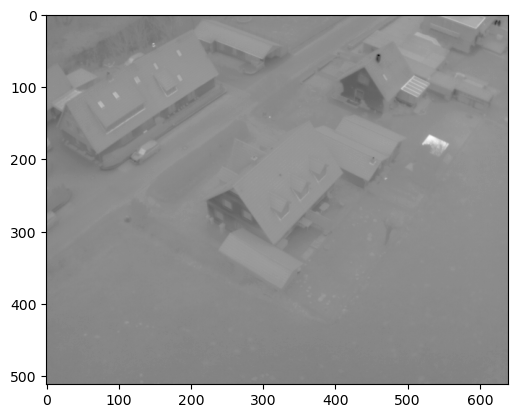

In [32]:
for file in file_names:
    raw_file = f'{folder}{file}'
    # print(raw_file) #checkpoint
    with open(raw_file, 'rb') as raw:
        buffer = raw.read()
        img = Image.frombytes("F", file_size, buffer)
        plt.imshow(np.array(img), cmap='Greys')
        plt.savefig(f'{folder}{file[:-3]}jpg')
        
        # Save to csv file
        np.savetxt(f'{folder}{file[:-3]}csv', np.array(img), delimiter=",", fmt='%f')

# Test Raw to Tiff + Tags

In [25]:
input_file_path: str = "./bsp_haus_1/DJI_20240304191422_0001_T.JPG"
raw_file_path: str = "./bsp_haus_1/tiff/DJI_20240304191422_0001_T.raw"
tif_file_path: str = "./bsp_haus_1/DJI_20231212164722_0001_T.tif"

file_size = (640,512)

In [27]:
# Save raw as tiff using Pillow package (alternatives: GDAL, Rasterio)
with open(raw_file_path, 'rb') as raw:
    bytes = raw.read()
    img = Image.frombytes("F", file_size, bytes)
    img.save(tif_file_path)

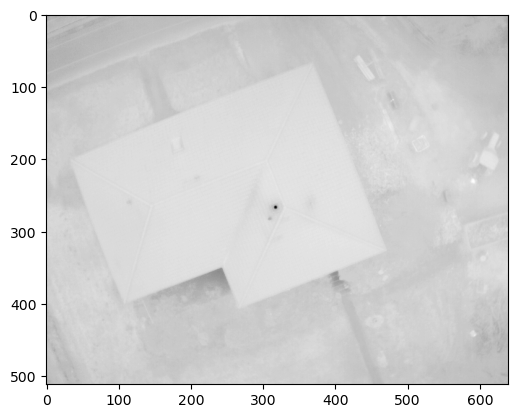

In [35]:
plt.imshow(np.array(img), cmap='Greys')

In [8]:
with exiftool.ExifToolHelper() as et:
    meta_data: dict = et.get_metadata(input_file_path)[0]

    TAGS = {
        'Model' : meta_data['EXIF:Model'],
        'Orientation' : meta_data['EXIF:Orientation'],
        'XResolution' : meta_data['EXIF:XResolution'],
        'YResolution' : meta_data['EXIF:YResolution'],
        'ResolutionUnit' : meta_data['EXIF:ResolutionUnit'],
        'GPSVersionID' : meta_data['EXIF:GPSVersionID'],
        'GPSLatitudeRef' : meta_data['EXIF:GPSLatitudeRef'],
        'GPSLatitude' : meta_data['EXIF:GPSLatitude'],
        'GPSLongitudeRef' : meta_data['EXIF:GPSLongitudeRef'],
        'GPSLongitude' : meta_data['EXIF:GPSLongitude'],
        'GPSAltitudeRef' : meta_data['EXIF:GPSAltitudeRef'],
        'GPSAltitude' : meta_data['EXIF:GPSAltitude'],
        'GPSStatus' : meta_data['EXIF:GPSStatus'],
        'GPSMapDatum' : meta_data['EXIF:GPSMapDatum'],
        'AbsoluteAltitude': meta_data['XMP:AbsoluteAltitude'],
        'RelativeAltitude': meta_data['XMP:RelativeAltitude'],
        'GimbalRollDegree': meta_data['XMP:GimbalRollDegree'],
        'GimbalYawDegree': meta_data['XMP:GimbalYawDegree'],
        'GimbalPitchDegree': meta_data['XMP:GimbalPitchDegree'],
        'FlightRollDegree': meta_data['XMP:FlightRollDegree']
    }

    et.set_tags(tif_file_path, TAGS)
    os.remove(tif_file_path + '_original')

# GDAL approach to export TIFFs from binary
see example here [Source](https://here.isnew.info/how-to-save-a-numpy-array-as-a-geotiff-file-using-gdal.html) or in Github Tutorial

In [ ]:
# driver = gdal.GetDriverByName('GTiff')
# gdal.UseExceptions()
# outDs = driver.Create(OUT_DIR + 'gdal.tif', 640, 512, 1, gdal.GDT_Float32)

# outband = outDs.GetRasterBand(1)

# outband.WriteArray(numpy_array)

# Legacy for image to raw

In [7]:
# Ask for meassure params, else set to default

emissivity = input('What was the emissivity? (Range: 0.1 - 1.0)')
humidity = input('What was the humidity? (Range: 20 - 100%)')
distance = input('What was the distance? (Range: 1 - 25m)')

# set defaults if nothing is entered
if not emissivity: 
    emissivity = '1.0' # default: 1.0 range: 0.1-1.0 https://royalsocietypublishing.org/doi/pdf/10.1098/rsos.181281 (e.g., average 0.957 for vegetation)
if not humidity: 
    humidity = '90' # default: 70 %  range: 20-100 %
if not distance: 
    distance = '25' # default: 5 m   range: 1-25 m    # altitude - object height (set to 25 if camera-target-distance > 25 m)


What was the emissivity? (Range: 0.1 - 1.0) 
What was the humidity? (Range: 20 - 100%) 
What was the distance? (Range: 1 - 25m) 


In [32]:
for file in file_names:
    
    # File Names
    input_file_path = INPUT_DIR + file
    raw_file_path = OUT_DIR + file[:-3] + 'raw'
    tif_file_path = OUT_DIR + file[:-3] + 'tif'

    # Execute dji IR processing
    # Inlcude checks or error handling, generally make sure to know what happens here

    # !!!!!!!!!!!!!!!! 
    # DOES NOT WORK FROM WITHIN PYTHON
    # MUST BE EXECUTED FROM TERMINAL
    # or maybe due to non ubuntu base imgage, but i dont want this anyway
    # proc = subprocess.run(['dji_irp',
    #                        '-s', input_file_path,
    #                        '-a', 'meassure',
    #                        '-o', raw_file_path,
    #                        '--measurefmt', 'float32'
    #                        '--emissivity', emissivity,
    #                        '--humidity', humidity,
    #                        '--distance', distance,
    #                        '-v', 'detail'
    #                       ],
    #                      )    # Save raw as tiff using Pillow package (alternatives: GDAL, Rasterio)

2024-04-11 12:05:55 [I][dirp_get_api_version][527] [FUNC][dirp_get_api_version]
DIRP API version number : 0x13
DIRP API magic version  : d4c7dea
R-JPEG file path : ./bsp_haus_1/DJI_20240304191422_0001_T.JPG
2024-04-11 12:05:55 [I][dirp_create_from_rjpeg][406] [FUNC][dirp_create_from_rjpeg]
2024-04-11 12:05:55 [I][__dirp_load_dll][258] ini file path : /app/djithermal/utility/bin/linux/release_x64/libv_list.ini
2024-04-11 12:05:55 [I][__dirp_load_dll][281] libv name : [cirp] [libv_cirp.so]
2024-04-11 12:05:55 [I][__dirp_load_dll][319] libv file path : [/app/djithermal/utility/bin/linux/release_x64/libv_cirp.so]
2024-04-11 12:05:55 [I][__dirp_load_dll][333] create new DLL handle : 0x2173f20 
2024-04-11 12:05:55 [I][__dirp_load_dll][341] get DLL function API handle : 0x7feefa600a80 
2024-04-11 12:05:55 [D][__dirp_load_dll][380] Append the libv_cirp.so handle to dll list. Current list size = [1]
2024-04-11 12:05:55 [I][__dirp_load_dll][383] load libv_cirp.so done
2024-04-11 12:05:55 [I][__d

In [8]:
print('emissivity is:', emissivity)
print('humidity is:  ', humidity)
print('distance is:  ', distance)

emissivity is: 1.0
humidity is:   90
distance is:   25


# Raw to Tiff plus Metadata

In [3]:
# Set constants

# Set Directories
# INPUT_DIR: str = input('Where are the original images (must be container volume)?')
# if not INPUT_DIR:
INPUT_DIR: str = "/data/auswertung/dorfstr_13_mucheln/"
OUT_DIR: str = f'{INPUT_DIR}tiffs/'

# Create output directory, if not exits
if not os.path.isdir(OUT_DIR):
    os.mkdir(OUT_DIR)


# file paths in input directory
file_names: list[str] = [file for file in os.listdir(INPUT_DIR) if file.endswith('.JPG')]
file_names.sort()
print ('number of files is:', len(file_names))
print(file_names)


# Hardcode File Size (image_width, image_height), since dji output always (640,512) even if original res is higher
# file_size = (file['File:ImageWidth'], file['File:ImageHeight'])
file_size = (640,512)

number of files is: 10
['DJI_20240311192557_0023_T.JPG', 'DJI_20240311192600_0024_T.JPG', 'DJI_20240311193619_0043_T.JPG', 'DJI_20240311193621_0044_T.JPG', 'DJI_20240311193910_0063_T.JPG', 'DJI_20240311193912_0064_T.JPG', 'DJI_20240311200829_0065_T.JPG', 'DJI_20240311200831_0066_T.JPG', 'DJI_20240311200952_0075_T.JPG', 'DJI_20240311200954_0076_T.JPG']


In [ ]:
    # Save raw as tiff using Pillow package (alternatives: GDAL, Rasterio)
    with open(raw_file_path, 'rb') as raw:
        bytes = raw.read()
        img = Image.frombytes("F", file_size, bytes)
        img.save(tif_file_path)

In [7]:
for file in file_names:
    
    # File Names
    input_file_path = INPUT_DIR + file
    raw_file_path = OUT_DIR + file[:-3] + 'raw'
    tif_file_path = OUT_DIR + file[:-3] + 'tif'

    # Execute dji IR processing
    # Inlcude checks or error handling, generally make sure to know what happens here
    
    proc = subprocess.run(['dji_irp',
                           '-s', input_file_path,
                           '-a', 'meassure',
                           '-o', raw_file_path,
                           '--measurefmt', 'float32'
                           '--emissivity', emissivity,
                           '--humidity', humidity,
                           '--distance', distance,
                           '-v', 'detail'
                          ],
                         )

    # Save raw as tiff using Pillow package (alternatives: GDAL, Rasterio)
    with open(raw_file_path, 'rb') as raw:
        bytes = raw.read()
        img = Image.frombytes("F", file_size, bytes)
        img.save(tif_file_path)

    with exiftool.ExifToolHelper() as et:
        metadata: dict = et.get_metadata(input_file_path)[0]

        TAGS = {
            'Model' : meta_data['EXIF:Model'],
            'Orientation' : meta_data['EXIF:Orientation'],
            'XResolution' : meta_data['EXIF:XResolution'],
            'YResolution' : meta_data['EXIF:YResolution'],
            'ResolutionUnit' : meta_data['EXIF:ResolutionUnit'],
            'GPSVersionID' : meta_data['EXIF:GPSVersionID'],
            'GPSLatitudeRef' : meta_data['EXIF:GPSLatitudeRef'],
            'GPSLatitude' : meta_data['EXIF:GPSLatitude'],
            'GPSLongitudeRef' : meta_data['EXIF:GPSLongitudeRef'],
            'GPSLongitude' : meta_data['EXIF:GPSLongitude'],
            'GPSAltitudeRef' : meta_data['EXIF:GPSAltitudeRef'],
            'GPSAltitude' : meta_data['EXIF:GPSAltitude'],
            'GPSStatus' : meta_data['EXIF:GPSStatus'],
            'GPSMapDatum' : meta_data['EXIF:GPSMapDatum'],
            'AbsoluteAltitude': meta_data['XMP:AbsoluteAltitude'],
            'RelativeAltitude': meta_data['XMP:RelativeAltitude'],
            'GimbalRollDegree': meta_data['XMP:GimbalRollDegree'],
            'GimbalYawDegree': meta_data['XMP:GimbalYawDegree'],
            'GimbalPitchDegree': meta_data['XMP:GimbalPitchDegree'],
            'FlightRollDegree': meta_data['XMP:FlightRollDegree']
        }

        et.set_tags(tif_file_path, TAGS)

    # remove intermittend files
    os.remove(tif_file_path + '_original')    
    # os.remove(raw_file_path)

2024-04-11 11:24:35 [I][dirp_get_api_version][527] [FUNC][dirp_get_api_version]
DIRP API version number : 0x13
DIRP API magic version  : d4c7dea
R-JPEG file path : /data/kevinkoeser/bsp_haus_1/DJI_20240304191422_0001_T.JPG
2024-04-11 11:24:35 [I][dirp_create_from_rjpeg][406] [FUNC][dirp_create_from_rjpeg]
2024-04-11 11:24:35 [I][__dirp_load_dll][258] ini file path : /app/djithermal/utility/bin/linux/release_x64/libv_list.ini
2024-04-11 11:24:35 [I][__dirp_load_dll][281] libv name : [cirp] [libv_cirp.so]
2024-04-11 11:24:35 [I][__dirp_load_dll][319] libv file path : [/app/djithermal/utility/bin/linux/release_x64/libv_cirp.so]
2024-04-11 11:24:35 [I][__dirp_load_dll][333] create new DLL handle : 0x121ff70 
2024-04-11 11:24:35 [I][__dirp_load_dll][341] get DLL function API handle : 0x7f2232400a80 
2024-04-11 11:24:35 [D][__dirp_load_dll][380] Append the libv_cirp.so handle to dll list. Current list size = [1]
2024-04-11 11:24:35 [I][__dirp_load_dll][383] load libv_cirp.so done
2024-04-11 

ValueError: not enough image data

# Tagging the images

**Learnings**
* TIF metadata follows a strict name space, that means on cannot simply add any metadata tag
* Further the approach of the Github tutorial fails.\
  (here the command to just transfer all metadata is used (-tagsfromfile))
* An exiftool test also suggests the file is corrupted [ET Forum](https://exiftool.org/forum/index.php?topic=11197.0)
---

In [ ]:
# Query metadata from subprocess 
# (not recommendet, since output is all strings (could work as well though,  I havent tested that all way through))

# output = subprocess.run(['exiftool', '/dji_thermal/images/DJI_20231212164722_0001_T.JPG'],capture_output=True, text=True)
# output.args
# meta = output.stdout
# print(meta)